In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
import matplotlib.pyplot as plt

In [4]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

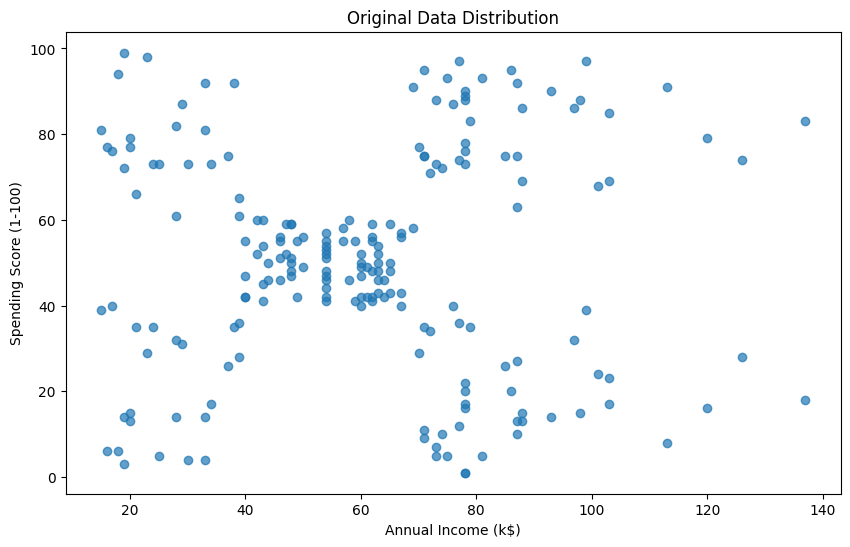

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], alpha=0.7)
plt.title('Original Data Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [6]:
x = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
from sklearn.cluster import KMeans

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

In [12]:
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(x_scaled)

In [13]:
clusters

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [14]:
data['Cluster'] = clusters

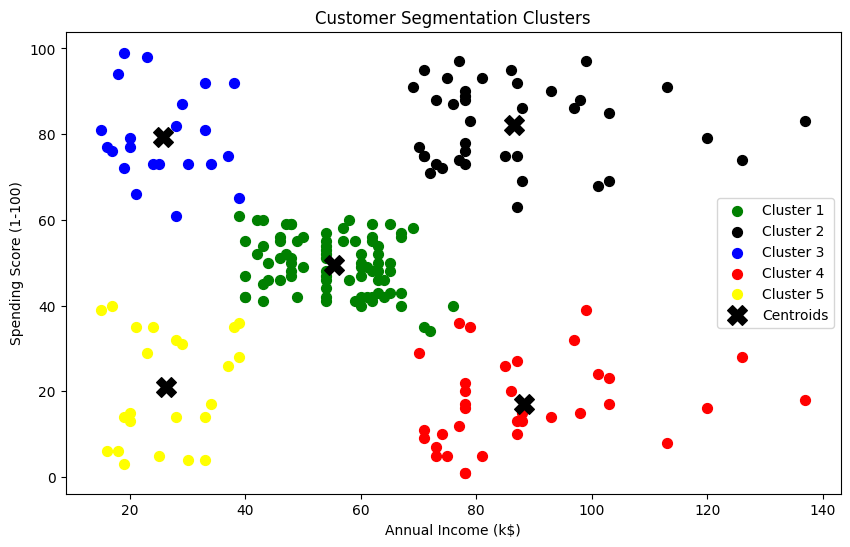

In [15]:
plt.figure(figsize=(10, 6))
colors = ['green', 'black', 'blue', 'red', 'yellow']
for i in range(optimal_k):
    plt.scatter(data[data['Cluster'] == i]['Annual Income (k$)'],data[data['Cluster'] == i]['Spending Score (1-100)'],
                s=50, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0]*scaler.scale_[0] + scaler.mean_[0],
            kmeans.cluster_centers_[:, 1]*scaler.scale_[1] + scaler.mean_[1],
            s=200, marker='X', c='black', label='Centroids')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
silhouette = silhouette_score(x_scaled, clusters)
print(f"\nSilhouette Score : {silhouette:.3f}")


Silhouette Score : 0.555
